In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyvstim import utils as parse

In [3]:
logpath = '../datatest/200407_KC020_wheel_KC/run00_pinknoise_2sftf_level2_5_opto.log'
data,comments = parse.parseVStimLog(logpath)

The number of screen pulses 935 does not match the visual stimulation indicatorFlag:69075 log.


In [77]:
from datetime import datetime as dt 

In [7]:
data.keys()

dict_keys(['stateMachine', 'vstim', 'screen', 'imaging', 'position', 'lick', 'reward', 'lap', 'cam1', 'cam2', 'cam3', 'act0', 'act1', 'opto'])

In [84]:
comments[2].split('-')[-1].strip(' ')

'11:53:27'

In [93]:
import json


In [96]:
prefpath = '../datatest/200313_KC019_wheel_KC/run00_pinknoise_2sftf_level3.prefs'
p=parsePref(prefpath)
p['tmpFolder'].split('\\')[-1]

../datatest/200313_KC019_wheel_KC/run00_pinknoise_2sftf_level3.prefs


't2'

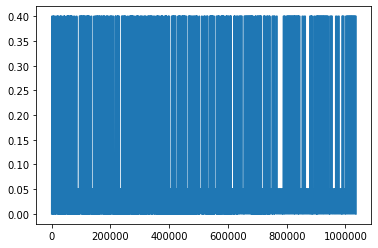

In [54]:
plt.plot(data['vstim']['blank'].dropna())

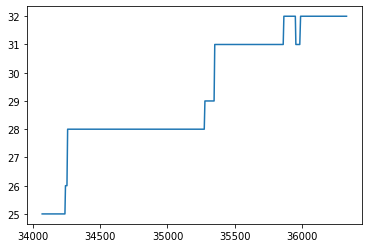

In [65]:
p=data['vstim']
c=p[(p['presentTime']>=166710)&(p['presentTime']<=174422)].dropna()
plt.plot(c['iTrial'])

In [56]:
data['vstim'].dropna()['iTrial'].iloc[172492]

IndexError: single positional indexer is out-of-bounds

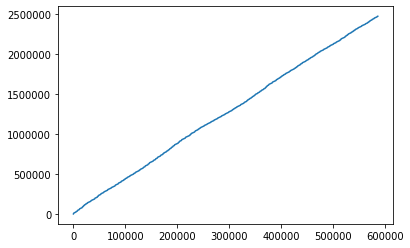

In [31]:
plt.plot(data['stateMachine']['presentTime'])

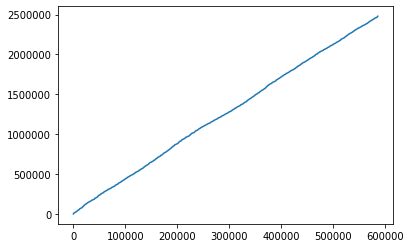

In [32]:
plt.plot(data['vstim']['presentTime'])

In [ ]:
dataState=data['stateMachine']
dataState

In [35]:
data['vstim'].dropna()

code   presentTime  iStim  iTrial  iFrame  blank  contrast  posx  \
861       10  1.215894e+04    1.0   -25.0     0.5    0.0       0.0  25.0   
862       10  1.217679e+04    1.0   -25.0     0.5    0.0       0.0  25.0   
863       10  1.219249e+04    1.0   -25.0     0.5    0.0       0.0  25.0   
868       10  1.220952e+04    1.0   -25.0     0.5    0.0       0.0  25.0   
873       10  1.222570e+04    1.0   -25.0     0.5    0.0       0.0  25.0   
...      ...           ...    ...     ...     ...    ...       ...   ...   
586099    10  2.472581e+06    1.0     3.0     1.0    0.0       0.0 -47.0   
586105    10  2.472599e+06    1.0     3.0     1.0    0.0       0.0 -47.0   
586110    10  2.472614e+06    1.0     3.0     1.0    0.0       0.0 -47.0   
586117    10  2.472632e+06    1.0     3.0     1.0    0.0       0.0 -47.0   
586123    10  2.472648e+06    1.0     3.0     1.0    0.0       0.0 -47.0   

        posy  indicatorFlag  
861      0.5            1.0  
862      0.5            1.0  
863      0.5            1.0  
868      0.5            1.0  
873      0.5            1.0  
...      ...            ...  
586099   1.0            1.0  
586105   1.0            1.0  
586110   1.0            1.0  
586117   1.0            1.0  
586123   1.0            1.0  

[71584 rows x 10 columns]

In [ ]:
plt.plot(dataState.presentTime,dataState.)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(datanona['iFrame'])

In [ ]:
def getFromLog(fname,column_name='vstim'):
    comments = []
    with open(fname,'r') as fd:
        for line in fd:
            if line.startswith('#'):
                comments.append(line.strip('\n').strip('\r'))
    codes = {}
    vlogheader = []
    righeader = []
    for c in comments:
        if c.startswith('# CODES:'):
            cod = c.strip('# CODES:').strip(' ').split(',')
            for cd in cod:
                k,v = cd.split('=')
                codes[int(v)] = k
        elif c.startswith('# VLOG HEADER:'):
            cod = c.strip('# VLOG HEADER:').strip(' ').split(',')
            vlogheader = [c.replace(' ','') for c in cod]
        elif c.startswith('# RIG CSV:'):
            cod = c.strip('# RIG CSV:').strip(' ').split(',')
            righeader = [c.replace(' ','') for c in cod]
            
    print(codes)
    if column_name not in codes.values():
        print('The key {0} is not in the log file!'.format(column_name))
        return False
    
    logdata = pd.read_csv(fname,
                          names = [i for i in range(len(vlogheader))],
                          delimiter=',',
                          header=None,comment='#',engine='c')
    data = dict()
    code = [k for k,v in codes.items() if v==column_name][0]
    k = codes[code]
    data[k] = logdata[logdata[0]==code]
    
    tmp_data=data[k].dropna()
    print(len(tmp_data))
        
    
#     if len(data[k]):
#         tmp = data[k].iloc[0].copy()
#         print(tmp)
#         ii = np.where([type(t) is str for t in tmp])
#         print(ii)
#         for i in ii:
#             tmp[i] = 0
#         idx = np.where([~np.isnan(d) for d in tmp])[0]
#         print(idx)
#         data[k] = data[k][idx]
#         if len(idx) <= len(righeader):
#             cols = righeader
#         else:
#             cols = vlogheader[:len(idx)]
#         print(cols)
#         data[k] = pd.DataFrame(data = data[k])
#         data[k].columns = cols
        

In [ ]:
getFromLog(logpath,'stateMachine')

In [ ]:
d=dict(x=1,y=2)
e=dict(y=3,z=4)
e.values()

In [ ]:
g={**d,**e}
g

In [ ]:
if 'x' in allkeys:
    print('k')